In [41]:
#'author - dp1618'
import os
import json
import pylab as pl
import pandas as pd
import numpy as np
import datetime
import operator
from IPython.display import Image
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [42]:
#import the data from federicas website : http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/MTA_Fare.npy

#url = 'http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/MTA_Fare.npy'
mta = np.load('MTA_Fare.npy')
#print mta

In [43]:
#print the types of rides

Image(filename = "Ridetypes.png")

In [44]:
print mta.shape

(600, 23, 194)


In [45]:
#create an array of negative ones and check if mta is equal to negative one at each point by 
#using numpy.equal 
temp = np.negative(np.ones((600, 23, 194)))
#use temp2 as a way to find all the negative ones and convert them to NaNs so that they do 
#not affect our arithmatic
temp2 = np.equal(mta, temp)
print temp2.shape

(600, 23, 194)


In [46]:
#convert mta to type float so NaN values can be added 
mta = mta.astype(float)

In [47]:
#replace all negative ones
mta[temp2] = float('NaN')

In [48]:
mtadaterange = pd.date_range('05/21/2010', periods = 194, freq = 'W')
print mtadaterange.shape

(194,)


In [49]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

#Task 1:
Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
Identify it and figure out what it is due to

In [50]:
#create an array of the station swipes over 194 weeks (combine all metrocard types)
mtastationsum = np.nansum(mta, axis = 1)
print mtastationsum.shape

(600, 194)


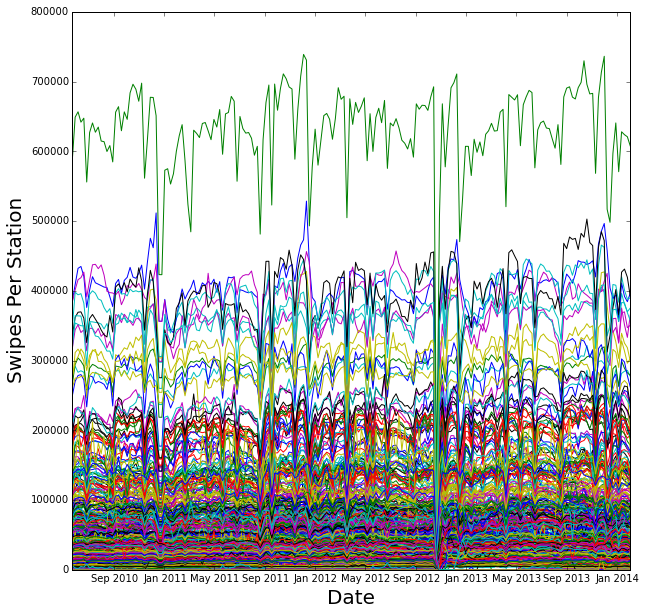

In [51]:
plt.figure(figsize=(10,10), dpi = 200)
ax = pl.plot(mtadaterange, np.transpose(mtastationsum)) 
pl.ylabel('Swipes Per Station', fontsize = 20)
pl.xlabel('Date', fontsize = 20)

In [52]:
#get the mean and standard dev of swipes at station to find outliers over time
mtastationmean = np.nanmean(mtastationsum, axis = 1)
mtastationstd = np.nanstd(mtastationsum, axis = 1)
print mtastationstd.shape

(600,)


In [53]:
#create a threshold of 3 standard deviations from the mean of the swipes per station
thresholdupper = mtastationmean + 3*mtastationstd
thresholdlower = mtastationmean - 3*mtastationstd
#print thresholdupper.shape

In [54]:
#find locations where we are outside the 3 standard deviations 
sigslow = [np.where(ts < thresholdlower[i]) for i, ts in enumerate(mtastationsum)]
sigsup = [np.where(ts > thresholdupper[i]) for i, ts in enumerate(mtastationsum)]

print sigslow
print sigsup

[(array([127, 128, 129, 130]),), (array([], dtype=int64),), (array([126]),), (array([126]),), (array([126]),), (array([126]),), (array([126]),), (array([126]),), (array([126]),), (array([126]),), (array([126]),), (array([ 65, 126]),), (array([ 30,  31, 126]),), (array([126]),), (array([126, 127, 134, 135]),), (array([126]),), (array([126]),), (array([126, 128, 129]),), (array([126]),), (array([126]),), (array([126]),), (array([126]),), (array([126]),), (array([126]),), (array([126]),), (array([], dtype=int64),), (array([ 30,  31, 126, 134]),), (array([126]),), (array([126, 134]),), (array([126, 129]),), (array([126]),), (array([ 30,  31, 126, 134]),), (array([126]),), (array([126]),), (array([126]),), (array([], dtype=int64),), (array([126]),), (array([126]),), (array([ 65,  66,  67,  68,  69,  70, 126]),), (array([126]),), (array([126]),), (array([126]),), (array([126]),), (array([126, 127]),), (array([126]),), (array([126]),), (array([ 30,  31, 126, 134]),), (array([126, 134]),), (ar

Based on visual inspection the most significant event across all stations occurs at week 126. 

In [55]:
print "Week 126 is %s" %(mtadaterange[126])

Week 126 is 2012-10-21 00:00:00


2012-10-21 was Hurricane Sandy

#Task 2: 
Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

In [56]:
#sum across stations for each rider type
mtaridersum = np.nansum(mta, axis = 0)
print mtaridersum.shape

(23, 194)


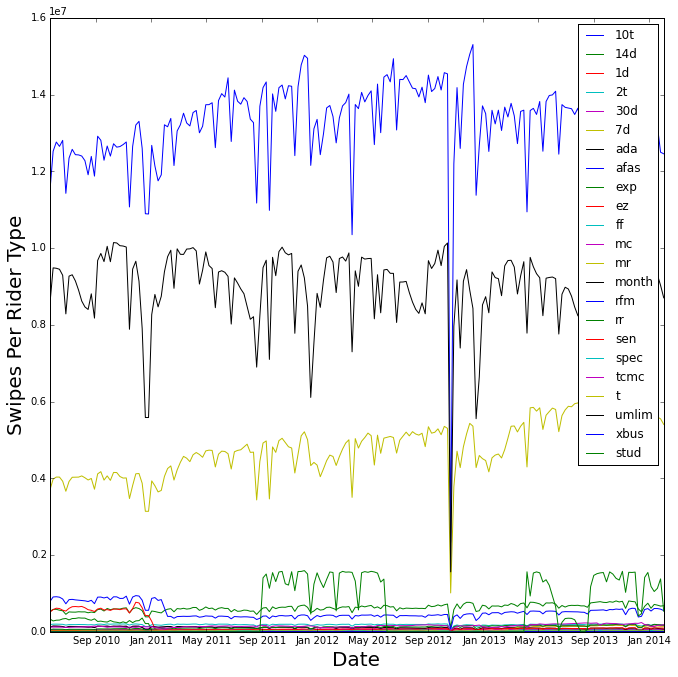

In [57]:
plt.figure(figsize=(11,11), dpi = 200)
ax = pl.plot(mtadaterange, np.transpose(mtaridersum)) 
pl.ylabel('Swipes Per Rider Type', fontsize = 20)
pl.xlabel('Date', fontsize = 20)
pl.legend(ridetype)

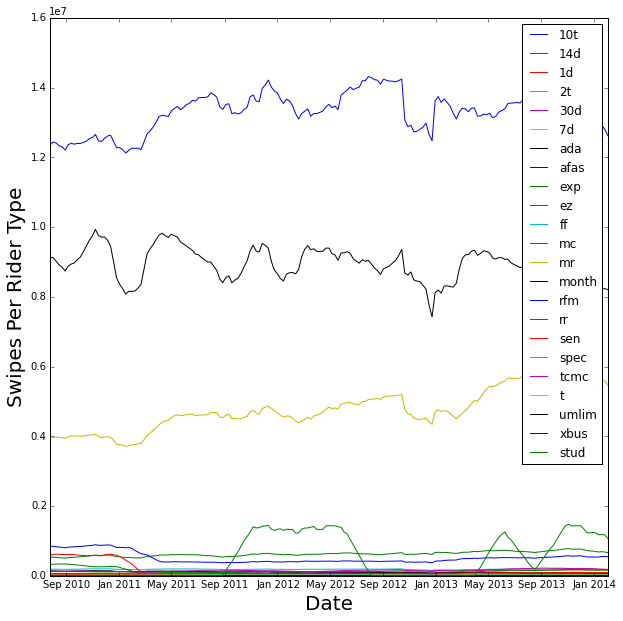

In [58]:
#take the rolling mean of the data for each type
mtariderrolling = pd.rolling_mean(np.transpose(mtaridersum), 10)
plt.figure(figsize=(10,10), dpi = 200)
ax = pl.plot(mtadaterange, mtariderrolling) 
pl.ylabel('Swipes Per Rider Type', fontsize = 20)
pl.xlabel('Date', fontsize = 20)
pl.legend(ridetype)

In [59]:
#check the mean of the begining of the time series to the end of the time series 
#by taking the ratio of the first point in mtariderrolling to the last point
#This will eliminate any rider types that have not changed in popularity

mtarollingratio = mtariderrolling[10,:]/mtariderrolling[193,:]
print mtarollingratio

[  9.85855761e-01   7.96898334e-01   9.01896857e-01   1.07217516e+00
   9.83155326e-01   7.26253084e-01   1.11214933e+00   4.80765217e+03
   9.42633429e+04   6.82381556e+05   1.23714609e+00   8.30622261e-01
   3.89558171e-05   1.74222625e+00   1.54426917e+00   3.87513943e-01
   3.47208425e-01   5.46373828e-02   6.53059649e-01   9.80984190e-01
   1.26020779e+00   6.18746842e-01   0.00000000e+00]


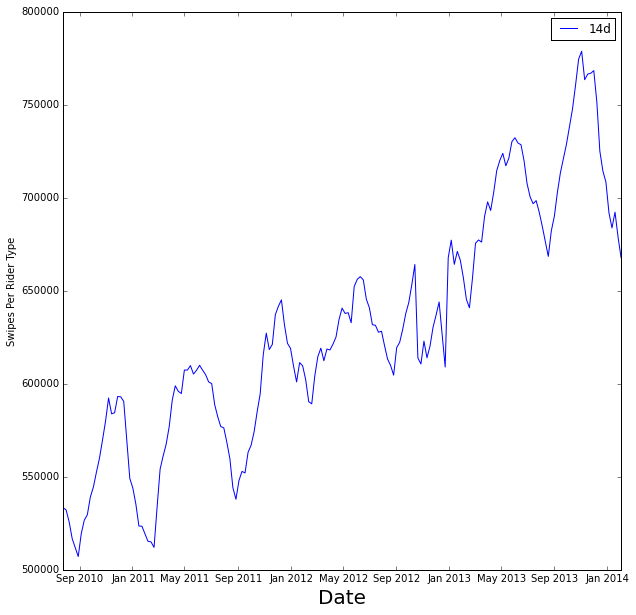

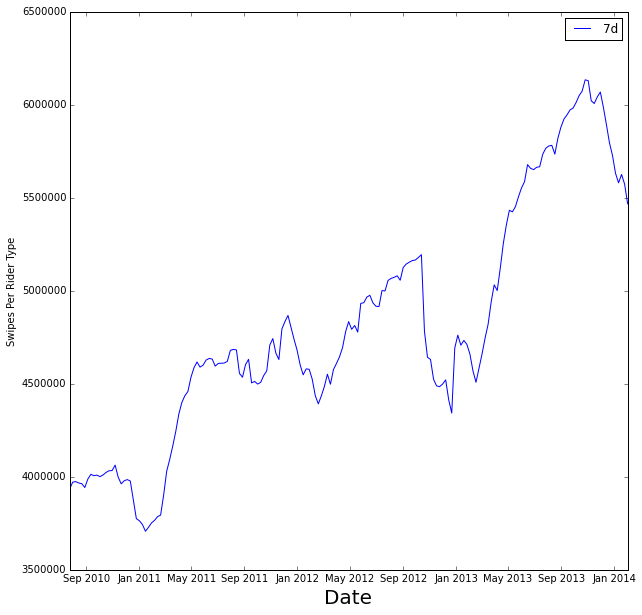

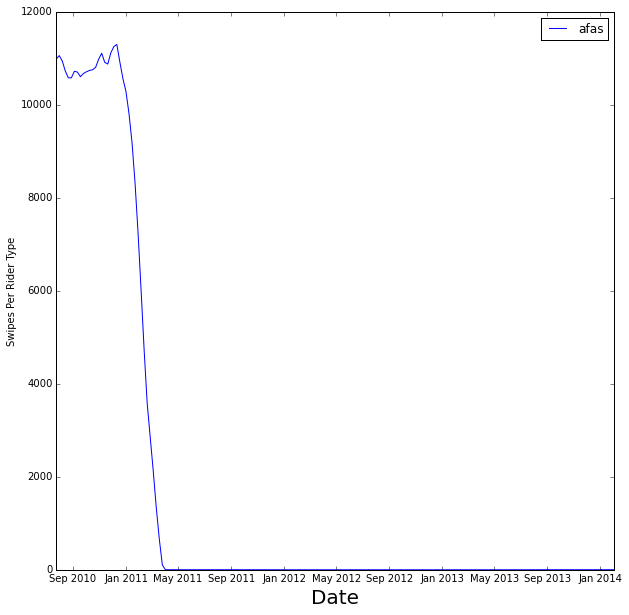

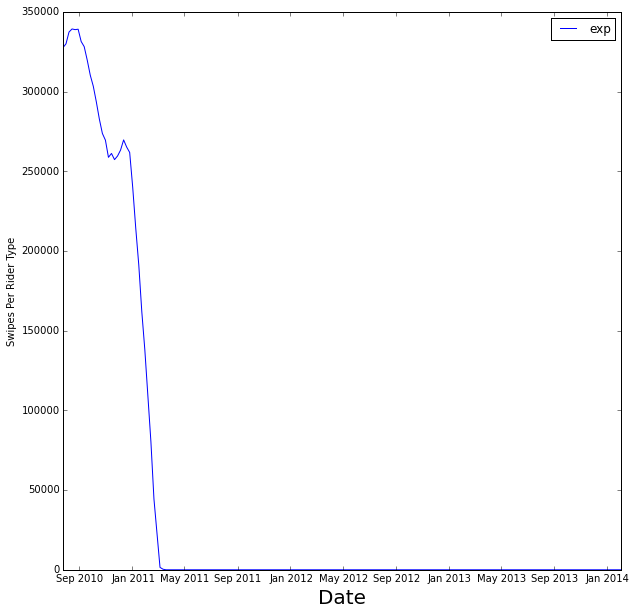

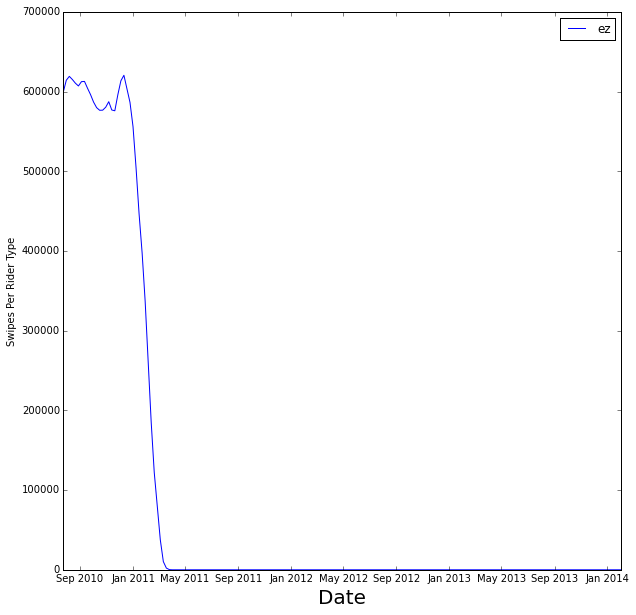

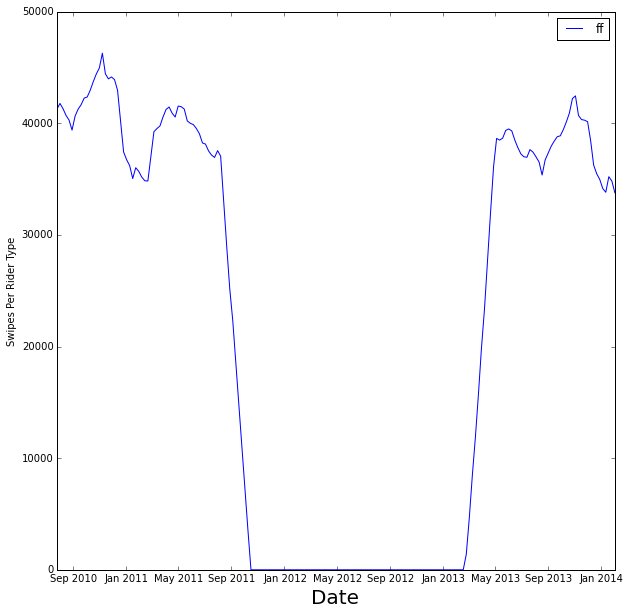

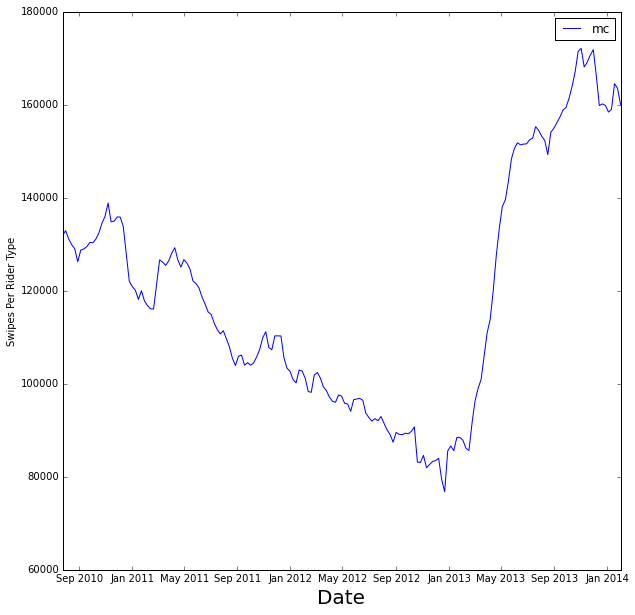

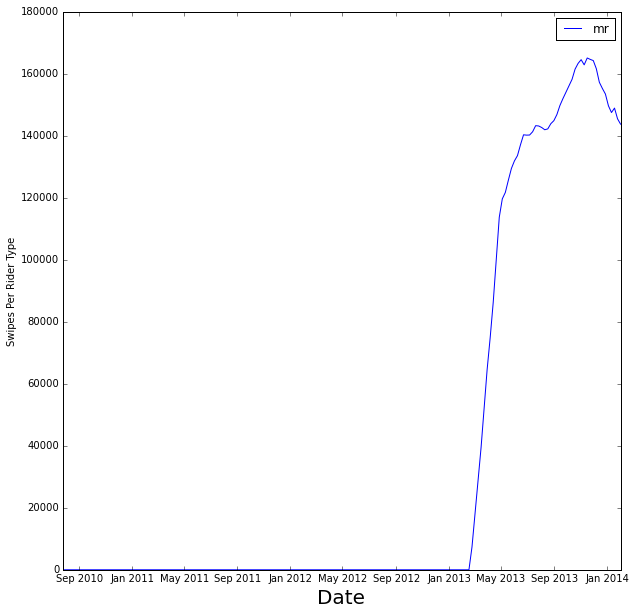

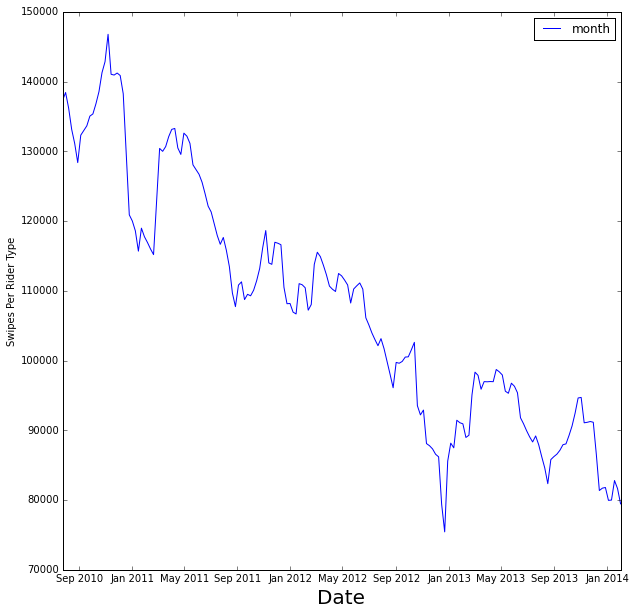

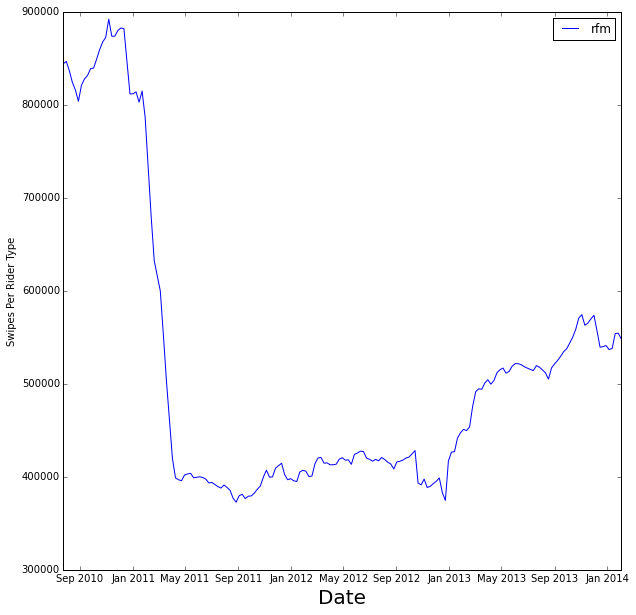

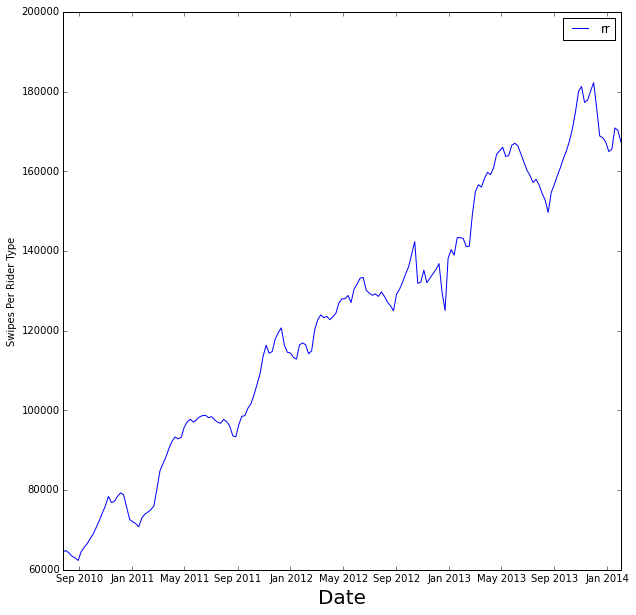

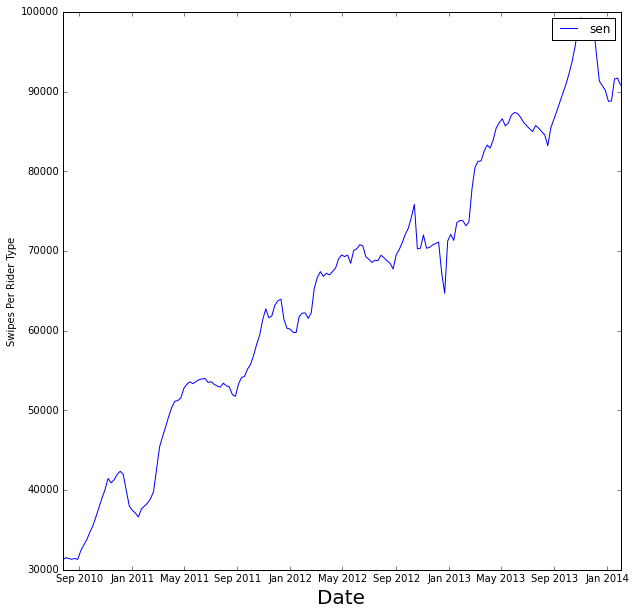

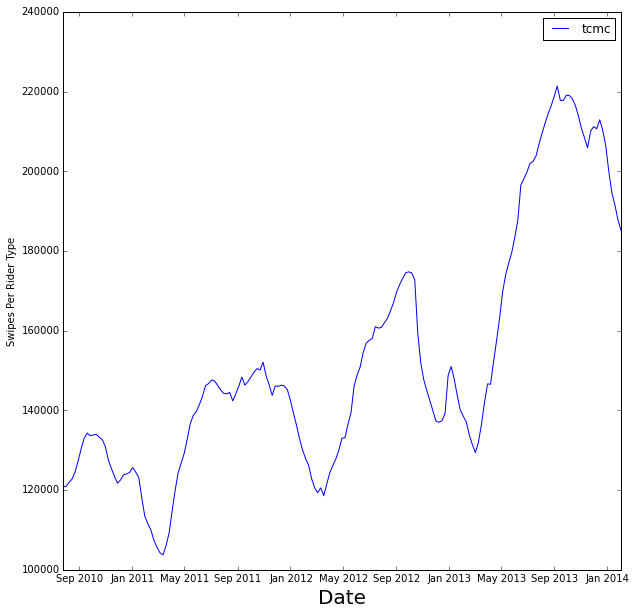

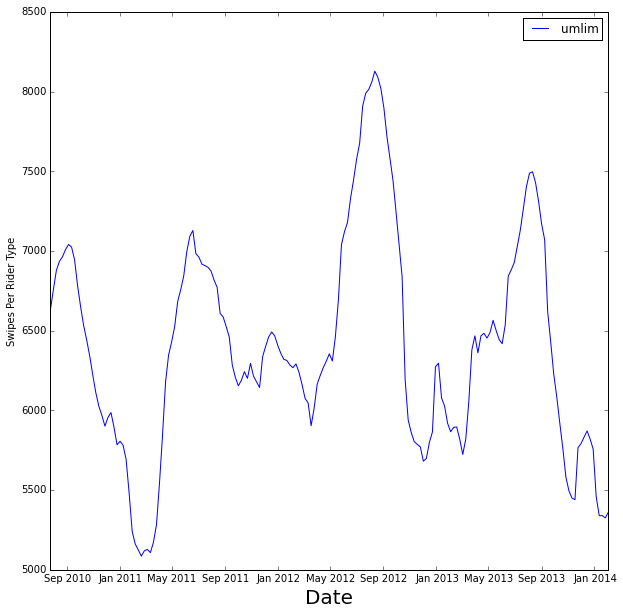

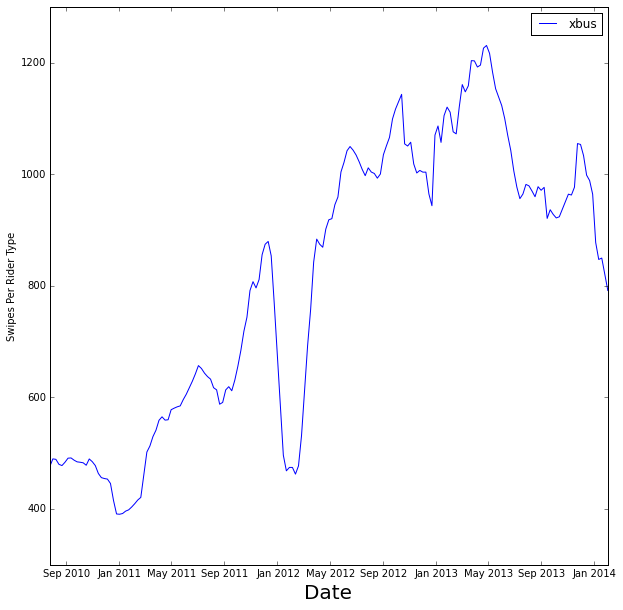

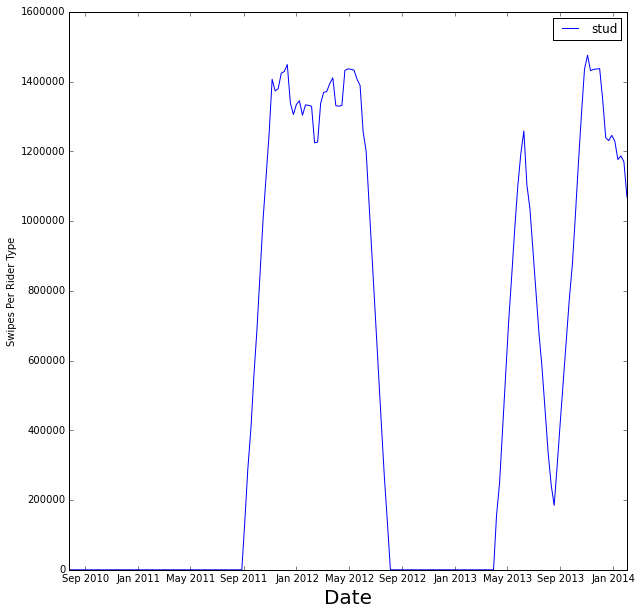

In [60]:
#Eliminate (or not print) the following types as not having a change in trend (ratios between 
#.9 and 1.1):
# 10t (0th item), 1d(2nd item), 2t(3rd item), 30d(4th item), ada(6th item) and t(19th item)

#plot the rest of the types

xtemp = [1, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22]
for i in xtemp:
    plt.figure(figsize=(10,10), dpi = 200)
    ax = pl.plot(mtadaterange, mtariderrolling[:, i])
    pl.ylabel('Swipes Per Rider Type', fontsize = 10)
    pl.xlabel('Date', fontsize = 20)
    pl.legend(ridetype[i:])


14 day, 7 day,  railroad, senior, special, transitcheck metrocard and expressbus have upward trends. monthly passes have a downward trend. 
We will use our array of ratios above to see how upward or downwards 

In [61]:
changes = [1, 5, 13, 15, 16, 17, 18, 21]

for n in changes:
    if n != 13:
        print '%s passes are increasing at a rate of %f.' %(ridetype[n], mtarollingratio[n])
    else:
        print '%s passes are decreasing at a rate of %f.' %(ridetype[n], 1-mtarollingratio[n])
    

14d passes are increasing at a rate of 0.796898.
7d passes are increasing at a rate of 0.726253.
month passes are decreasing at a rate of -0.742226.
rr passes are increasing at a rate of 0.387514.
sen passes are increasing at a rate of 0.347208.
spec passes are increasing at a rate of 0.054637.
tcmc passes are increasing at a rate of 0.653060.
xbus passes are increasing at a rate of 0.618747.


#Task 3:
Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

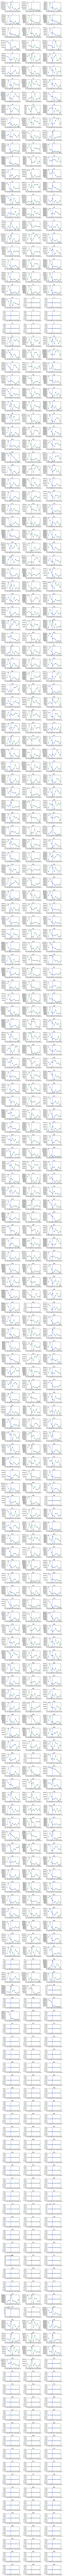

In [62]:
fig = plt.figure(figsize = (10,400))
mtastationsum = pd.DataFrame(mtastationsum) #make this a data frame
#for loop to plot each station
for i in range(600):
        ax = fig.add_subplot(200,3,i+1)
        f = np.abs(np.fft.rfft(mtastationsum.loc[i,:]))
        #plot dots and a line
        ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], 'o', ms = 5)
        ax.set_title("%s" %(str(i)))
        ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], '-')
        #xlimits and x ticks
        ax.set_xlim(0,1.0/20)
        ax.set_xticklabels([ "%.2f"%(1/f) for f in ax.get_xticks()], fontsize=10)
        #Vertical Line at period of 52 weeks 
        plt.axvline(1.0/52)
        plt.subplots_adjust(wspace=.5, hspace=.5, left=.125, right=.9, top=1, bottom=.1)

The stations with the highest yearly periodicity are 150, 194, 327 and 0 (by eye).  These stations have values between 2.5 and 3 million in the power spectrums plotted above.  The higher the value of the power spectrum at a given period, the higher the periodicity of that station at that time. 

In [80]:
#check the by eye calculation by finding the 4th value (approx 52 weeks) of the fourier 
#transform and sorting the values and finding the 4 highest values
p = {}
for i in range(600):
    p[i] = np.abs(np.fft.rfft(mtastationsum.loc[i,:]))[4]
dict(sorted(p.iteritems(), key = operator.itemgetter(1), reverse = True)[:4])

{0: 2980160.6355953491,
 150: 2931895.8769513383,
 194: 2950388.929214194,
 327: 2402218.5809588572}